# Problème Monty Hall et Simulation de Distributions 

## Problème *Monty Hall* avec Simulation Monte-Carlo

Il existe un casse-tête probabiliste [*le problème de Monty Hall*](https://fr.wikipedia.org/wiki/Probl%C3%A8me_de_Monty_Hall) aussi appelé *paradoxe de Monty Hall*, inspiré du jeu télévisé américain [*Let's Make a Deal*](https://fr.wikipedia.org/wiki/Let%27s_Make_a_Deal) présenté par [Monty Hall](https://fr.wikipedia.org/wiki/Monty_Hall). 

Le problème peut être formulé de la façon suivante: 

La personne est placée devant trois portes fermées.

<img src="img/3-doors.png" alt="Trois portes fermées" width="400px">

Derrière une porte se trouve un prix et derrière deux autres une chèvre. 

La personne choisit une porte qui reste fermée :

<img src="img/choice-1.png" alt="1er choix d'une porte" width="400px">

Le.a présentateur.rice, qui sait ce qu'il y a derrière chaque porte, ouvre une des portes qui restent derrière laquelle se trouve une chèvre :

<img src="img/goat-revealed.png" alt="Une chèvre est dévoilée derrière une des portes" width="400px">

La personne a alors le choix : soit ouvrir la porte choisie initiallement, soit ouvrir une autre porte (i.e. changer son avis).  
<img src="img/question.png" alt="Quelle porte choisir?" width="620px">

> A la personne intérêt à changer son choix initial ? 

> Quelles sont ses chances de gagner le prix en agissant au mieux ?

<img style="float: right;" src="https://allthatsinteresting.com/wordpress/wp-content/uploads/2018/03/portrait-of-marilyn-vos-savant.jpg" alt="Marilyn Vos Savant's portrait, source: allthatsinteresting.com, under Wikimedia Commons license" width="150px"> Ce problème est devenu connu par le grand public grâce à [Marilyn vos Savant](https://fr.wikipedia.org/wiki/Marilyn_vos_Savant), une femme possédant l'un des quotients intellectuels les plus élevés au monde, indiqué par le *Guiness Book of records*. Elle publie l'énoncé et sa réponse dans sa rubrique *Ask Marilyn* de Parade Magazine en septembre 1990 :

*Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, " Do you want to pick door No. 2? " Is it to your advantage to switch your choice?*

Afin de répondre à cette question, nous allons d'abord approcher ce problème de point de vue probabiliste, et ensuite nous allons faire une simulation.

### Approche probabiliste

Soit $A = \text{\{la personne gagne le prix\}}$ et $B = \text{\{la personne a choisi la bonne porte\}}$. Alors, selon la formule de probabilité totale :

$$\mathbb{P}(A) = \mathbb{P}(A|B)\times \mathbb{P}(B) + \mathbb{P}(A|\bar{B})\times \mathbb{P}(\bar{B})$$

Notons que la probabilité que la personne a choisi la bonne porte, $\mathbb{P}(B) = \frac{1}{3}$ lorsqu'il y a un seul prix derrière 3 portes. Et $\mathbb{P}(\bar{B}) = \frac{2}{3}$. Ainsi, nous obtenons : 

$$\mathbb{P}(A) = \mathbb{P}(A|B)\times \mathbb{P}(B) + \mathbb{P}(A|\bar{B})\times \mathbb{P}(\bar{B}) = \mathbb{P}(A|B)\times \frac{1}{3} + \mathbb{P}(A|\bar{B})\times \frac{2}{3}$$

Considérons le cas, où **la personne garde son choix initial** :

* la probabilité de gagner sachant que la porte choisie est bonne est 1, i.e. $\mathbb{P}(A|B) = 1$
* la probabilité de gagner sachant que la porte choisie n'est pas bonne est 0, i.e. $\mathbb{P}(A|\bar{B}) = 0$

Dans ce cas là : 
$$\mathbb{P}(A) = \mathbb{P}(A|B)\times \mathbb{P}(B) + \mathbb{P}(A|\bar{B})\times \mathbb{P}(\bar{B}) = \mathbb{P}(A|B)\times \frac{1}{3} + \mathbb{P}(A|\bar{B})\times \frac{2}{3} = 1\times \frac{1}{3} + 0\times \frac{2}{3} = \mathbf{\frac{1}{3}}$$

<img src="img/tree-remain-initial-choice.png" alt="Arbre des probabilités si la stratégie est de garder le choix initial" width="620px">



Maintenant, considérons le cas où **la personne change son avis** :

* si la personne a choisi initialement une bonne porte, la probabilité de gagner si elle change par la suite est 0, i.e. $\mathbb{P}(A|B) = 0$
* si la personne a choisi initialement une bonne porte, la probabilité de gagner si elle change par la suite est 1, i.e. $\mathbb{P}(A|\hat{B}) = 1$.

Donc : 
$$\mathbb{P}(A) = \mathbb{P}(A|B)\times \mathbb{P}(B) + \mathbb{P}(A|\bar{B})\times \mathbb{P}(\bar{B}) = \mathbb{P}(A|B)\times \frac{1}{3} + \mathbb{P}(A|\bar{B})\times \frac{2}{3} = 0\times \frac{1}{3} + 1\times \frac{2}{3} = \mathbf{\frac{2}{3}}$$

<img src="img/tree.png" alt="Arbre des probabilités si la stratégie est de changer le choix initial" width="620px">

Autrement dit, initialement les probabilités de gagner se répartissent de la façon suivante :

<img src="img/doors-prob.png" alt="Probabilité de gagner initialement" width="400px">

Une fois qu'une chèvre est dévoilée, la probabilité de gagner se répartit de la façon suivante :

<img src="img/doors-prob-goat.png" alt="Probabilité de gagner initialement" width="400px">


### Simulation

Vérifions le raisonement ci-dessous avec une simulation. 

Nous allons avoir besoin de générateur de pseudo-aléatoire. Nous pouvons utiliser le module [`random`](https://docs.python.org/3/library/random.html).

In [1]:
# chargement du module de générateur de nombre pseudo-aléatoires
from random import randint, choice
import random

random.seed(4016)


Afin de choisir un nombre entier $N$ compris entre $a$ et $b$ (i.e. $a \leq N \leq b$), on peut utiliser la fonction [`random.randint(a, b)`](https://docs.python.org/3/library/random.html#random.randint), e.g. :

In [2]:
# choisir un nombre entre 1 et 6
randint(1, 6)


2

Afin de choisi un élément d'une séquence `s` d'une manière aléatoire, on peut utiliser la fonction [`random.choice()`](https://docs.python.org/3/library/random.html#random.choice), e.g.:

In [3]:
# liste (séquence d'éléments)
s = ["a", "b", "c"]
# choisir un élément
choice(s)


'b'

#### Exemple de simulation (lancements d'un dé)

Imaginons que le problème traité est le suivant. Nous lancons un dé équilibré 6 fois. Ce qui nous intéresse est la probabilité d'avoir 6 valeurs différentes lors de ces lancements. 

De point de vue probabiliste, cette probabilité est égale à :

$$\frac{6}{6} \times \frac{5}{6} \times \frac{4}{6} \times \frac{3}{6} \times \frac{2}{6} \times \frac{1}{6} = \frac{6!}{6^6} = 0.015$$

In [4]:
import math

# calculons la valeur précédente
math.factorial(6) / 6**6


0.015432098765432098

Passons à la simulation en identifiant des points suivants :

* *variables à controler* : les résultats de 6 lancements d'un dé
* *distribution de chaque variable* : uniforme discrète, 1/6 pour chaque côté :

|1|2|3|4|5|6|
|--|--|--|--|--|--|
|$$\frac{1}{6}$$|$$\frac{1}{6}$$|$$\frac{1}{6}$$|$$\frac{1}{6}$$|$$\frac{1}{6}$$|$$\frac{1}{6}$$|
* *boucle* (à répéter autant de fois que le nombre d'essais) :
    - *réalisation d'une variable aléatoire* : un lancement d'un dé
    - *calcul déterministe du résultat* : ajout de résultat de la réalisation dans un ensemble (`set`). Si la taille de cet ensemble au bout de 6 lancement est égale à 6 (nombre de lancement), donc tous les lancements ont eu des résultats différents. Si c'est le cas, on incrémente la valeur de variable-compteur de succès. 
* *Agrégation de résultat* : diviser le nombre de succès par le nombre d'essais pour avoir la probabilité

In [5]:
# nombre d'essais
trials = 100000
# initialisation du compteur de succès
success = 0
# nombre de lancement de dé
rolls = 6
# répétitions selon le nombre d'essais
for i in range(trials):
    # ensemble de résultats uniques lors de lancements
    faces = set()
    # pour chaque lancement
    for j in range(rolls):
        # réalisation d'une distribution uniforme sur [1, 6]
        res = randint(1, 6)
        # ajout de résultat dans l'ensemble faces
        faces.add(res)
    # test si le nombre de valeurs dans faces est égale à nombre de lancements de dé
    if len(faces) == rolls:
        # incrémente le succès
        success += 1
# calcul de la probabilité du succès
prob = success / trials
# affichage du résultat
print(f"La probabilité du succès : {prob}")


La probabilité du succès : 0.01557


Notons qu'on obtient le résultat conforme avec la valeur théorique.

#### Application au problème de Monty Hall 

Soit `doors = ["A", "B", "C"]` une liste contenant les options pour les portes. 
Ecrivez la fonction `simulation_monty_hall(trials)` qui prend en paramètre le nombre de runs à faire (`trials`) et effectue des opérations suivantes : 

* choisit la porte gagnante d'une manière aléatoire à partir de `doors`, 
* choisit la porte "choix initial" de la personne d'une manière aléatoire à partir de `doors`, 
* agrège les résultats de victoire en choisissant soit la porte initiale, soit en changeant la porte une fois une chèvre dévoilée. 
* calcule le résultat de réussite de chacune de stratégies : si le choix initial est gagnant, alors c'est la stratégie de garder le choix initial qui gagne, sinon c'est la stratégie de changer la porte qui gagne.

```
def simulation_monty_hall(trials=10000):
    """
    Simulation du problème de Monty Hall. La porte gagnante et la porte choisie initialement par l'utilisateur 
    sont choisies d'une manière aléatoire.
    
    Keyword arguments:
    trials --  nombre de simulations (essais). Par défaut, 10000 
    
    Return:
    un dictionnaire contenant le nombre de fois que la porte choisie initialement gagne (initial) et 
    le nombre de fois où la stratégie de changer la porte gagne (change)
    """
```

In [6]:
## Donnez votre code ici


def simulation_monty_hall(trials=10000):
    """
    Simulation du problème de Monty Hall. La porte gagnante et la porte choisie initialement par l'utilisateur
    sont choisies d'une manière aléatoire.

    Keyword arguments:
    trials --  nombre de simulations (essais). Par défaut, 10000

    Return:
    un dictionnaire contenant le nombre de fois que la porte choisie initialement gagne (initial) et
    le nombre de fois où la stratégie de changer la porte gagne (change)
    """
    # nb of sucesses with strategy 1
    success_initial = 0
    # nb of sucesses with strategy 2
    success_change = 0
    # Doors
    doors = ["A", "B", "C"]
    # Simulation
    for i in range(trials):
        # Choose winning door randomly
        gagnante = choice(doors)
        # Choose initial door randomly
        choix_initial = choice(doors)
        # Choose the winning strategy
        if gagnante == choix_initial:
            success_initial += 1
        else:
            success_change += 1
    return {"initial": success_initial, "change": success_change}


Faites les simulations pour le nombre de runs 10, 100, 1000, 10000, 50000, 100000, 1000000. Afficher les statistiques suivantes :
- le nombre de runs
- le nombre de fois la stratégie de garder le choix initial (stratégie 1) gagne
- le nombre de fois la stratégie de changer (stratégie 2) gagne 
- la probabilité de gagner avec la stratégie 1 
- la probabilité de gagner avec la stratégie 2 

Commentez.

In [7]:
## Donnez votre code ici

runs = [10, 100, 1000, 10000, 50000, 100000, 1000000]

for elt in runs:
    sim = simulation_monty_hall(elt)
    print(
        f"Pour {elt} essais :\n\
            - Garder le choix initial (strat 1) gagne {sim['initial']} fois.\n\
            - Changer de porte (strat 2) gagne {sim['change']} fois.\n\
            - La probabilité de gagner avec la stratégie 1 est : {sim['initial']/elt}.\n\
            - La probabilité de gagner avec la stratégie 2 est : {sim['change']/elt}.\n"
    )


Pour 10 essais :
            - Garder le choix initial (strat 1) gagne 6 fois.
            - Changer de porte (strat 2) gagne 4 fois.
            - La probabilité de gagner avec la stratégie 1 est : 0.6.
            - La probabilité de gagner avec la stratégie 2 est : 0.4.

Pour 100 essais :
            - Garder le choix initial (strat 1) gagne 34 fois.
            - Changer de porte (strat 2) gagne 66 fois.
            - La probabilité de gagner avec la stratégie 1 est : 0.34.
            - La probabilité de gagner avec la stratégie 2 est : 0.66.

Pour 1000 essais :
            - Garder le choix initial (strat 1) gagne 345 fois.
            - Changer de porte (strat 2) gagne 655 fois.
            - La probabilité de gagner avec la stratégie 1 est : 0.345.
            - La probabilité de gagner avec la stratégie 2 est : 0.655.

Pour 10000 essais :
            - Garder le choix initial (strat 1) gagne 3310 fois.
            - Changer de porte (strat 2) gagne 6690 fois.
            - La 

Pour 50000 essais :
            - Garder le choix initial (strat 1) gagne 16680 fois.
            - Changer de porte (strat 2) gagne 33320 fois.
            - La probabilité de gagner avec la stratégie 1 est : 0.3336.
            - La probabilité de gagner avec la stratégie 2 est : 0.6664.

Pour 100000 essais :
            - Garder le choix initial (strat 1) gagne 33098 fois.
            - Changer de porte (strat 2) gagne 66902 fois.
            - La probabilité de gagner avec la stratégie 1 est : 0.33098.
            - La probabilité de gagner avec la stratégie 2 est : 0.66902.

Pour 1000000 essais :
            - Garder le choix initial (strat 1) gagne 334223 fois.
            - Changer de porte (strat 2) gagne 665777 fois.
            - La probabilité de gagner avec la stratégie 1 est : 0.334223.
            - La probabilité de gagner avec la stratégie 2 est : 0.665777.



**Conclusions / commentaires :** <span style="color:red"><br>
On remarque qu'avec de plus en plus de tests, on converge bien vers les probabilités calculées précédemment: la stratégie 1 gagne 1/3 des fois tandis que la stratégie 2 gagne 2/3 des fois.</span>

## Simulation des lois

**Objectifs :**

* Comprendre la génération de pseudo-aléatoires
* Transformer la distribution uniforme sur $[0, 1]$ en une distribution plus complexe.* Transformer la distribution uniforme sur $[0, 1]$ en une distribution plus complexe.

### Distribution uniforme

Nous étudierons les générateurs suivants :
1. le *générateur de Von Neumann*, introduit en 1946, qui consiste à élever un nombre au carré puis à retirer le premier et le dernier chiffre, et à itérer cette opération ;
2. un *générateur à congruence linéaire usuel*, dit *Standard Minimal*,
3. un *générateur à congruence linéaire avec un choix différent des paramètres*, dit *RANDU*.

Le principe de ces générateurs est décrit ci-après.

Nous n'allons pas étudier le *générateur Mersenne-Twister*, qui est le générateur par défaut de `R` et [`Python`](https://docs.python.org/3/library/random.html). Il peut également être trouvé chez `numpy`,  notamment la classe [`numpy.random.MT19937(seed=None)`](https://numpy.org/doc/stable/reference/random/bit_generators/mt19937.html). En `numpy`, le générateur principal est [Permuted Congruential Generator (64-bit, PCG64), `numpy.random.PCG64(seed=None)`](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64) 

Le générateurs Mersenne-Twister ne sera pas décrit
ici. Nous renvoyons à [[1]](https://fr.wikipedia.org/wiki/Mersenne_Twister) et [[2]](https://link.springer.com/chapter/10.1007/978-3-540-85912-3_26) pour une description détaillée.

**Table de matières :**

- [Définition d'un générateur aléatoire](#1)
    - [Définition](#1.1)
    - [Générateurs pseudo-aléatoires étudiés](#1.2)
        - [Générateur de Von Neumann](#von-neumann)
        - [Générateurs à congruence linéaires](#congruence)
            - [Standard Minimal](#std-min)
            - [RANDU](#randu)
        - [Graine des générateurs](#graine)
    - [Qualité de la séquence produite par un générateur pseudo-aléatoire](#tests)

<a name='1'></a>
#### Définition d'un générateur aléatoire

Dans beaucoup d’applications informatiques (la simulation, les jeux vidéos, la cryptographie, etc.), il est nécessaire de tirer des nombres au hasard pour initialiser différents algorithmes. Pour cela, on utilise ce qu’on appelle des nombres **pseudo-aléatoires** pour souligner leur différence par rapport aux véritables suites de variables aléatoires indépendantes identiquement distribuées. Nous nous intéressons ici à quelques méthodes classiquement utilisées pour générer des nombres pseudo-aléatoires (pour plus de détails, se référer par exemple à [[3]](http://math.univ-lyon1.fr/~jberard/genunif-www.pdf)). Plus précisément, il existe deux types de générateurs :
* les générateurs *à sorties imprédictibles* : ils génèrent des nombres pseudo-aléatoires dont on ne peut pas prévoir la valeur,
* les générateurs *à sorties prédictibles* : dans ces générateurs, on initialise (on dit *nourrir*) l’algorithme à partir d’un nombre connu appelé **graine** et le générateur produira toujours la même suite s'il est initialisé avec la même valeur.

Notons que la plupart des algorithmes de génération de nombres pseudo-aléatoires essaient de produire des sorties qui sont *uniformément distribuées* ($\mathcal{U}([0,1])$). Ceci est expliqué par le fait qu'à partir d'une suite uniforme, il existe des méthodes pour générer des suites de nombres selon les principales lois de probabilité (e.g., *la méthode de la transformée inverse*). 

[Vidéo sur la génération de nombre aléatoires et psudo-aléatoires par Khan Academy](https://www.khanacademy.org/computing/computer-science/cryptography/crypt/v/random-vs-pseudorandom-number-generators)

<a name='1.1'></a>
##### Définition

<div class="alert alert-block alert-info">
Un <b>générateur pseudo-aléatoire</b> est une structure $G = (S, \mu, f, U, g)$ avec :

* $S$ un (grand) ensemble fini d’états,
* $\mu$ est une distribution de probabilité sur $S$ (le plus souvent la loi uniforme),
* $f : S \rightarrow S$ est la fonction de transition utilisée pour passer d'un état $S_i$ au suivant $S_{i+1}$.
* $U$ est l'ensemble image de la fonction $g : S \rightarrow U$ qui fait correspondre à chaque état $S_i$ un échantillon de $U$. Très classiquement, on va avoir $U = [0, 1]$ pour une loi uniforme sur $[0,1]$.
</div>

Le générateur fonctionne donc en itérant la fonction $f$ à partir d'un état initial $S_0$ appelé **graine** (en. **seed**), choisi par l’utilisateur. En notant $(X_n)_{n\geq1}$ la liste des valeurs successives produites par le générateur, on a la relation $X_n = g(\underbrace{f\circ ... \circ f(S_0)}_{n\text{ fois}})$ où $f$ est appliquée $n$ fois.

**Remarque :** La notation $g \circ f$ se lit "$g$ rond $f$" ou "$g$ suivi de $f$" et correspond à la *composition de fonctions* aussi appelée *composition d'applications*, i.e. $h = g \circ f$ telle que $h(x) = g(f(x))$.

En pratique, le générateur ne garde en mémoire que l'état courant $S_n \in S$, initialisé à $S_0$ et mis à jour lors de chaque appel de $f : S_n = f(S_{n-1})$, la valeur renvoyée étant égale à $X_n = g(S_n)$.

Le choix de la graine $S_0$ détermine donc entièrement la suite de nombres pseudo-aléatoires produite par le générateur car une fois cette graine choisie, le comportement de la suite est complétement **déterministe**.

<a name='1.2'></a>
##### Générateurs pseudo-aléatoires étudiés

<a name='von-neumann'></a>
###### Générateur de Von Neumann

<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/JohnvonNeumann-LosAlamos.jpg/220px-JohnvonNeumann-LosAlamos.jpg" alt="John von Neumann's portrait, source: wikipedia" width="150px"> En 1949, John von Neumann propose un générateur pseudo-aléatoire dit *la méthode middle-square* (carré médian). La méthode utilise des nombres comportant 10 chiffres.  

La fonction $f$ consiste à élever le nombre $S_n$ au carré et à ôter les premiers et les derniers chiffres en prenant les chiffres au milieu, de manière symétrique, de sorte à ce que le nombre obtenu soit compris entre 0 et 9999. 

**Exemples :**

Soit $S_n = 1315$. Ce nombre est composé de $k = 4$ chiffres. 

1. $1315^2 = 1729225$. Notons que $1729225$ est composé de 7 chiffres, ce qui ne correspond pas à $2*k = 8$. On peut donc ajouter un 0 au début, ce qui va donner "**0**1729225"
2. on récupère les 4 chiffres du milieu : $01\underbrace{7292}_{milieu}25$

Donc $S_{n+1} = 7292$.

Soit $S_n = 3432, k=4$ : 

1. $3432^2 = 11778624$, où le nombre de chiffres est $8 = 2k$
2. on récupère les 4 chiffre du milieu : $11\underbrace{7786}_{milieu}24$

Donc $S_{n+1} = 7786$

**Question 1.** Ecrivez la fonction `vonNeumann_no_repeated(seed=0)` qui génére les nombres pseudo-aléatoires avec la méthode de Von Neumann en partant de la graine donnée `seed`.
**Question 2.** Testez pour $S_0 = 1315$, $S_0 = 7$ et $S_0 = 42$.

```
def vonNeumann_no_repeated(seed=0):
    """
    Geneation of pseudo-random numbers using middle-square method by von Neumann. 
    
    Keyword arguments:
    seed -- Initial number. By default, seed = 0 
    
    Return:
    sn -- final state  
    counter -- the number of iterations    
    already_seen_list -- a sequence of created numbers
    """
```

Notons que les résultats obtenus pour $S_0 = 7$ et $S_0 = 42$ doivent correspondre bien aux états présentés sur le graphe orienté de 100 nombres pseudo-aléatoires composés de 2 chiffres obtenus avec la méthode middle-square avec $k=2$ ci-dessous :

<img src="img/Middle_square_method_2_digits.png" alt="Graphe orienté de 100 nombres pseudo-aléatoires composés de 2 chiffres obtenus avec la méthode middle-square avec $k=2$. Source : wikipedia https://en.wikipedia.org/wiki/Middle-square_method#/media/File:Middle_square_method_2_digits.svg" width="300px">.

On peut remarquer que parmi les 100 premiers nombres entiers aucun peut générer des séquences sans venir à un des états suivants : 0, 10, 50, 60 et la boucle $24 \leftrightarrow 57$. 

Afin de pouvoir générer le nombre donné de nombres pseudo-aléatoires, nous allons relacher la contrainte de non-répétition. 

**Question 3.** Mettez à jour l'implémentation de la fonction en relachant le contrainte de non-répétition. 

```
def vonNeumann(seed=0, k=10):
    """
    Geneation of pseudo-random numbers using middle-square method by von Neumann. 
    
    Keyword arguments:
    seed -- Initial number. By default, seed = 0 
    
    Return:
    sn -- final state  
    counter -- the number of iterations    
    already_seen_list -- a sequence of created numbers
    """
```

Pour le `seed=42` et `k=20`, vous devew obtenir :
`[76, 77, 92, 46, 11, 12, 14, 19, 36, 29, 84, 5, 2, 0, 0, 0, 0, 0, 0, 0]`

In [8]:
## Donnez votre code ici
def vonNeumann_no_repeated(seed=0):
    """
    Geneation of pseudo-random numbers using middle-square method by von Neumann.

    Keyword arguments:
    seed -- Initial number. By default, seed = 0

    Return:
    sn -- final state
    counter -- the number of iterations
    already_seen_list -- a sequence of created numbers
    """
    # initial state
    sn = seed
    # counter of iterations
    counter = 0
    # a list of already seen numbers
    already_seen_list = []
    while True:
        # increment the counter
        counter += 1
        # square the number
        sn2 = sn**2
        # convert to string
        length = len(str(sn))
        # check if length is odd
        if length % 2 != 0:
            length += 1
        sn2_str = str(sn2)
        # add zeros to the left if necessary
        if len(sn2_str) != length * 2:
            sn2_str = sn2_str.zfill(length * 2)
        # extract the middle digits
        sn2_str = sn2_str[length // 2 : length + length // 2]
        # convert to integer
        sn = int(sn2_str)
        # check if the number is already seen
        if sn in already_seen_list:
            break
        # add the number to the list
        already_seen_list.append(sn)
    return sn, counter, already_seen_list


In [9]:
# Test avec seeds 1315, 7, 42

print(vonNeumann_no_repeated(seed=1315))
print(vonNeumann_no_repeated(seed=7))
print(vonNeumann_no_repeated(seed=42))


(9600, 8, [7292, 1732, 9998, 9600, 1600, 5600, 3600])
(0, 4, [4, 1, 0])
(0, 15, [76, 77, 92, 46, 11, 12, 14, 19, 36, 29, 84, 5, 2, 0])


In [10]:
## Donnez votre code ici


def vonNeumann(seed=0, k=10):
    """
    Geneation of pseudo-random numbers using middle-square method by von Neumann.

    Keyword arguments:
    seed -- Initial number. By default, seed = 0

    Return:
    sn -- final state
    counter -- the number of iterations
    list -- a sequence of created numbers
    """
    # initial state
    sn = seed
    # counter of iterations
    counter = 0
    # a list of already seen numbers
    list = []
    for i in range(k):
        # increment the counter
        counter += 1
        # square the number
        sn2 = sn**2
        # convert to string
        length = len(str(sn))
        # check if length is odd
        if length % 2 != 0:
            length += 1
        sn2_str = str(sn2)
        # add zeros to the left if necessary
        if len(sn2_str) != length * 2:
            sn2_str = sn2_str.zfill(length * 2)
        # extract the middle digits
        sn2_str = sn2_str[length // 2 : length + length // 2]
        # convert to integer
        sn = int(sn2_str)
        # add the number to the list
        list.append(sn)
    return sn, counter, list


In [11]:
# Test avec seed 42
print(vonNeumann(seed=42, k=20))


(0, 20, [76, 77, 92, 46, 11, 12, 14, 19, 36, 29, 84, 5, 2, 0, 0, 0, 0, 0, 0, 0])


<a name='congruence'></a>
##### Générateurs à congruence linéaire

Introduits en 1948, les générateurs à congruence linéaire ont ensuite eu beaucoup de succès. L’idée est d'appliquer une transformation linéaire suivie d'une opération de congruence. Soit $S_0$ la graine. Pour chaque graine on obtient une suite de nombres pseudo-alétaoires de la façon suivante. Dans le cas discret,  :

$$S = U = \{0, ..., m\}$$
$$S_n = f(S_{n-1}) = (a \cdot S_{n-1} + b)\mod m$$
$$X_n = g(S_n) = S_n$$

Notons que du fait de l'opération $mod$, les termes de la suite sont compris entre 0 et $m-1$. Si on souhaite se ramener à l'intervalle $U = [0, 1]$, on appliquera $X_n = g(S_n) = S_n/m$. 

En outre, étant donné la dépendance de chaque terme du précédent, si un nombre apparaît une 2ème fois, toute la suite se reproduit à partir de ce nombre. La suite est donc amenée à se répéter au bout de certain temps. 

D'autres types de congruence peuvent être considérés. Par exemple, la fonction `rand` de `C` utilise par défaut une congruence de type polynomial.

Nous étudierons dans ce TP deux générateurs à congruence linéaire :
    
* Standard Minimal
* RANDU

Les valeurs de paramètres de ces deux algorithmes sont données ci-dessous :

| Algorithme | $$a$$ | $$b$$ | $$m$$ | 
|--|--|--|--|
| Standard Minimal | $16807$ | $0$ | $2^{31}-1$ |
| RANDU | $65539$ | $0$ | $2^{31}$ | 

**Question 4:** Implémentez la fonction `linear_congruence` qui retourne une séquence de $n$ éléments en commeçant avec $S_0 = seed$ suivant la méthode de génération de nombres pseudo-aléatoires à congruence linéaire.

```
def linear_congruence(seed=0, a=65539, b=0, m=2**31, n=1):
    """
    Geneation of n pseudo-random numbers using linear congruence method with parameters a, b and m . 
    S_n = (a * S_(n-1) + b) mod m
    
    Keyword arguments:
    seed -- Initial number. By default, seed = 0 
    a    -- Multiplier a in the formula
    b    -- Increment b in the formula
    m    -- Modulus m in the formula
    
    Return:
    series -- a list of n generated numbers starting from seed   
    xn -- a list of n generated numbers in the interval [0, 1]
    """
```

In [12]:
# Donnez votre code ici
def linear_congruence(seed=0, a=65539, b=0, m=2**31, n=1):
    # initial state
    series = []
    S = seed
    # generate n pseudo-random numbers
    for _ in range(n):
        S = (S * a + b) % m
        series.append(S)
    return {"series": series, "xn": [i / m for i in series]}


<a name='std-min'></a>
###### *Standard Minimal* (MINSTD)

MINSTD (Standard Minimal) est un générateur à congruence linéaire proposé en 1988 par Stephen K. Park et Keith W. Miller. Il est défini par :
$$S_n = 16807 \cdot S_{n-1} \mod (2^{31}-1)$$

Le générateur est décrit sur $\{0,...,2^{31}-2\}$.

En 1993, le multiplicateur $a = 48271$ était proposé au lieu de $16807$ et est utilisé par le générateur `minstd_rand` de [C++11](https://en.wikipedia.org/wiki/C%2B%2B11).

**Question 5:** En vous servant de la fonction `linear_congruence` créé dans la *Question 1*, proposez une implémentation de la méthode MINSTD.

```
def minstd(seed=0, n=1):
    """
    Generate a list of n pseudorandom numbers based on Standard Minimal algorithm starting with seed.
    """
```

Testez votre implémentation avec les paramètres : `seed=1`, `n=6`.

In [13]:
## Donnez votre code ici


def minstd(seed=0, n=1):
    """
    Generate a list of n pseudorandom numbers based on Standard Minimal algorithm starting with seed.
    """
    return linear_congruence(seed, 16807, 0, 2**31 - 1, n)["xn"]


In [14]:
## Donnez votre code ici

# Test avec seed = 1 et n = 6
minstd(1, 6)


[7.826369259425611e-06,
 0.13153778814316625,
 0.7556053221950332,
 0.4586501319234493,
 0.5327672374121692,
 0.21895918632809036]

<a name='randu'></a>
###### *RANDU*

RANDU est un générateur à congruence linéaure qui était utilisé principalement dans les années 1960s et 1970s. Il est définit par récurrence :  
$$S_n = 65539 \cdot S_{n-1} \mod 2^{31}$$
avec la graine $S_0$ impair.  

Le générateur est décrit sur $\{0,...,2^{31}-1\}$.

Pour $S_0 = 1$, une séquence contenant 6 éléments est la suivante : 
$$\matrix{1 & 65539 & 393225 & 1769499 & 7077969 & 26542323}$$

**Question 6:** En vous servant de la fonction `linear_congruence` créé dans la *Question 1*, proposez une implémentation de la méthode RANDU.

```
def randu(seed=0, n=1):
    """
    Generate a list of n pseudorandom numbers based on RANDU algorithm starting with seed.
    """
```

Testez votre implémentation avec les paramètres : `seed=1`, `n=6`.

In [15]:
## Donnez votre code ici


def randu(seed=0, n=1):
    """
    Generate a list of n pseudorandom numbers based on RANDU algorithm starting with seed.
    """
    return linear_congruence(seed, 65539, 0, 2**31, n)["xn"]


In [16]:
## Donnez votre code ici

# Test avec seed = 1 et n = 6
randu(1, 6)


[3.051897510886192e-05,
 0.00018310965970158577,
 0.0008239871822297573,
 0.003295936156064272,
 0.012359732296317816,
 0.04449496837332845]

<a name='graine'></a>
##### Graine des générateurs

Pour choisir la graine, dans le `Python` de base, on emploie la fonction [`random.seed(a=None)`](https://docs.python.org/3/library/random.html#random.seed) que l'on "nourrit" à l'aide d'un nombre. Si vous souhaitez faire une expérience reproductible, il faut initialiser la graine avec un nombre fixé. Ceci doit être utilisé notamment pour comparer des algorithmes. En effet les comparaisons sont alors réalisées sur deux jeux de données simulées identiques. Si le but est de générer une suite difficilement prévisible et qui varie rapidement, il faut l’initialiser avec un nombre qui varie rapidement. Par exemple, vous pouvez prendre le nombre de cycles utilisés par votre processeur depuis son démarrage. 

<a name='tests'></a>
#### Qualité de la séquence produite par un générateur pseudo-aléatoire

Nous testerons dans la suite les générateurs pseudo-aléatoires VonNeumann, RANDU, Standard Minimal. Il existe beaucoup de tests permettant de s’assurer de la qualité des nombres aléatoires produits (voir les suites de tests complètes du NIST [[6]](http://csrc.nist.gov/groups/ST/toolkit/rng/index.html) ou de DIEHARD [[7]](https://en.wikipedia.org/wiki/Diehard_tests) et [[10]](https://ani.stat.fsu.edu/diehard/)).

Nous nous focaliserons sur le test visuel. 

Plus précisément,
il s’agira de tester pour chacun des générateurs :
* pour le premier test, visuel, sur une séquence de $n = 1000$ valeurs.
* pour les trois derniers tests sur une séquence de $n = 100$ et pour 100 initialisations différentes.

**Question 7 :** Générez $n=1000$ valeurs avec chaque algorithme, en fixant la graine.  

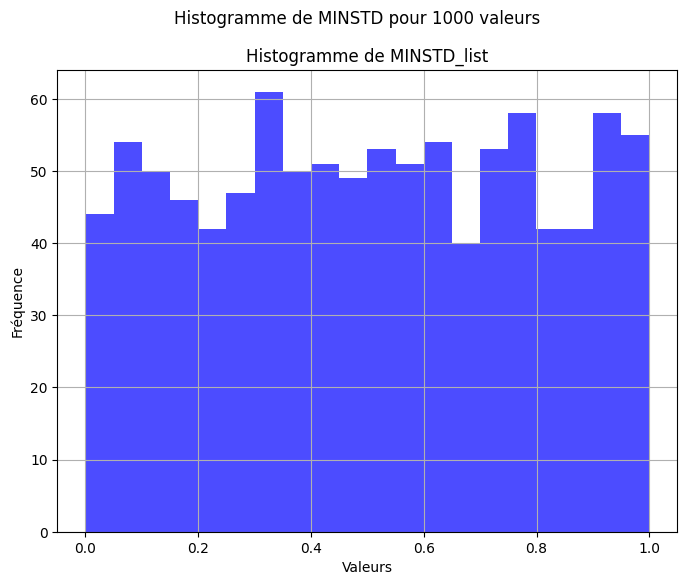

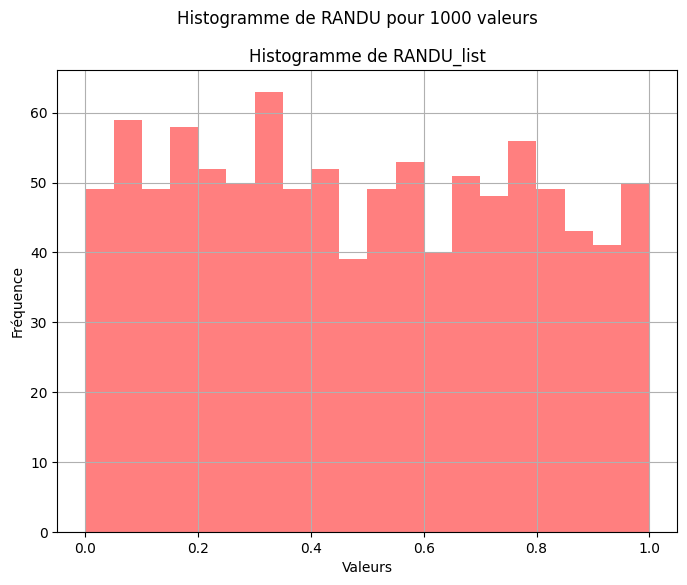

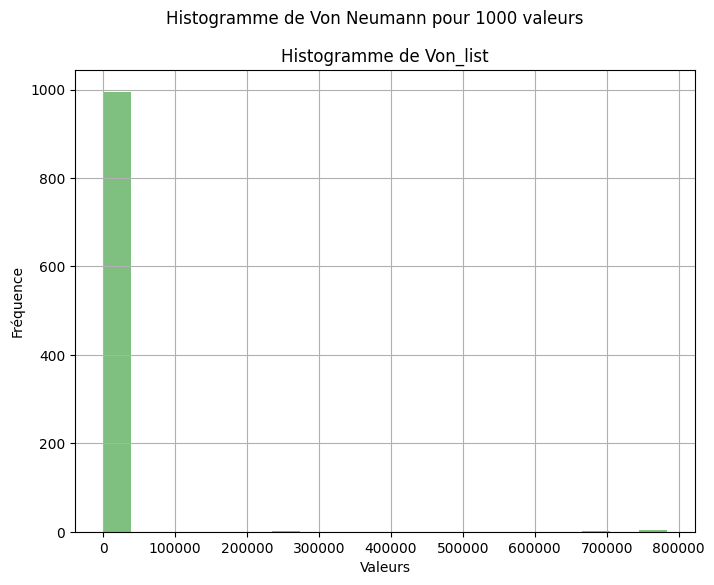

In [17]:
## Donnez votre code ici
import matplotlib.pyplot as plt
import random

seed = 56978
n = 1000

Von_list = vonNeumann(seed, n)[2]
RANDU_list = randu(seed, n)
MINSTD_list = minstd(seed, n)


# Tracer l'histogramme pour MINSTD_list
plt.figure(figsize=(8, 6))
plt.hist(MINSTD_list, bins=20, color="blue", alpha=0.7)
plt.title("Histogramme de MINSTD_list")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(True)
plt.suptitle("Histogramme de MINSTD pour 1000 valeurs")
plt.show()

# Tracer l'histogramme pour RANDU_list
plt.figure(figsize=(8, 6))
plt.hist(RANDU_list, bins=20, color="red", alpha=0.5)
plt.title("Histogramme de RANDU_list")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(True)
plt.suptitle("Histogramme de RANDU pour 1000 valeurs")
plt.show()

# Tracer l'histogramme pour Von_list
plt.figure(figsize=(8, 6))
plt.hist(Von_list, bins=20, color="green", alpha=0.5)
plt.title("Histogramme de Von_list")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(True)
plt.suptitle("Histogramme de Von Neumann pour 1000 valeurs")
plt.show()


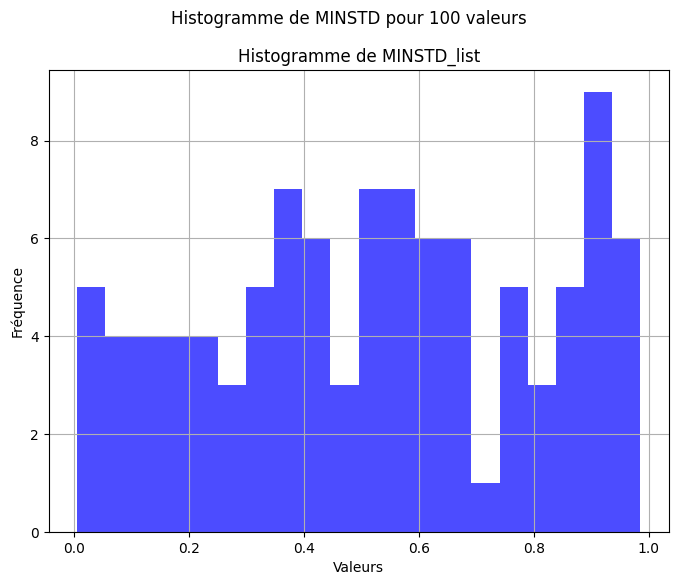

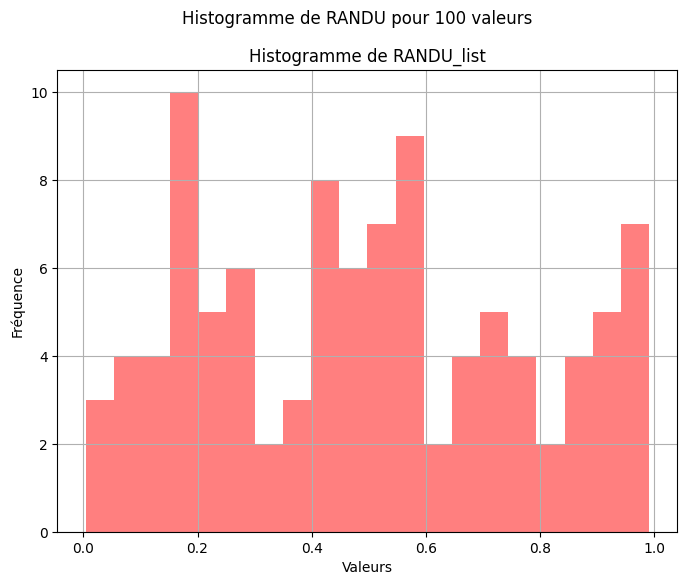

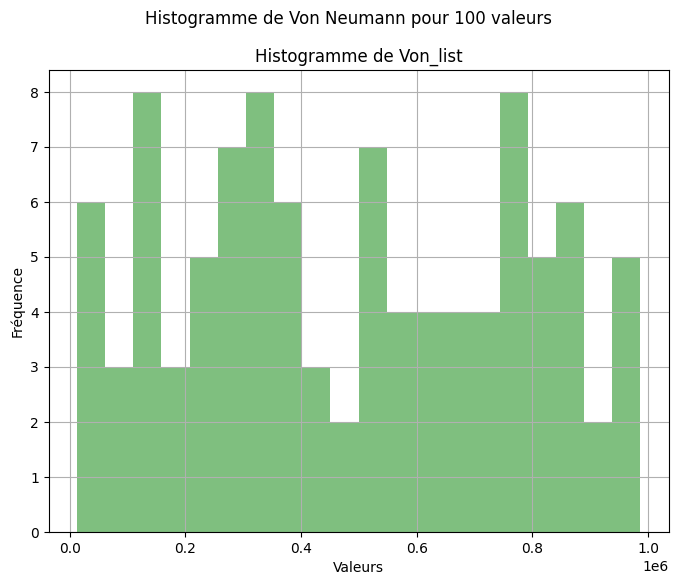

In [18]:
## Donnez votre code ici

seed = 565178
n = 100

Von_list = vonNeumann(seed, n)[2]
RANDU_list = randu(seed, n)
MINSTD_list = minstd(seed, n)


# Tracer l'histogramme pour MINSTD_list
plt.figure(figsize=(8, 6))
plt.hist(MINSTD_list, bins=20, color="blue", alpha=0.7)
plt.title("Histogramme de MINSTD_list")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(True)
plt.suptitle("Histogramme de MINSTD pour 100 valeurs")
plt.show()

# Tracer l'histogramme pour RANDU_list
plt.figure(figsize=(8, 6))
plt.hist(RANDU_list, bins=20, color="red", alpha=0.5)
plt.title("Histogramme de RANDU_list")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(True)
plt.suptitle("Histogramme de RANDU pour 100 valeurs")
plt.show()

# Tracer l'histogramme pour Von_list
plt.figure(figsize=(8, 6))
plt.hist(Von_list, bins=20, color="green", alpha=0.5)
plt.title("Histogramme de Von_list")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(True)
plt.suptitle("Histogramme de Von Neumann pour 100 valeurs")
plt.show()


##### Test Visuel

**Objectif :** vérifier le caractère uniforme des valeurs générées.

**Question 8 :** Tracez, pour chacun des générateurs, l’histogramme des sorties observées pour une suite de $k = 100$ valeurs. Que constatez-vous ? Expliquez.

Text(0.5, 0.98, 'Histogrammes de Von Neumann pour 100 valeurs et 100 seeds')

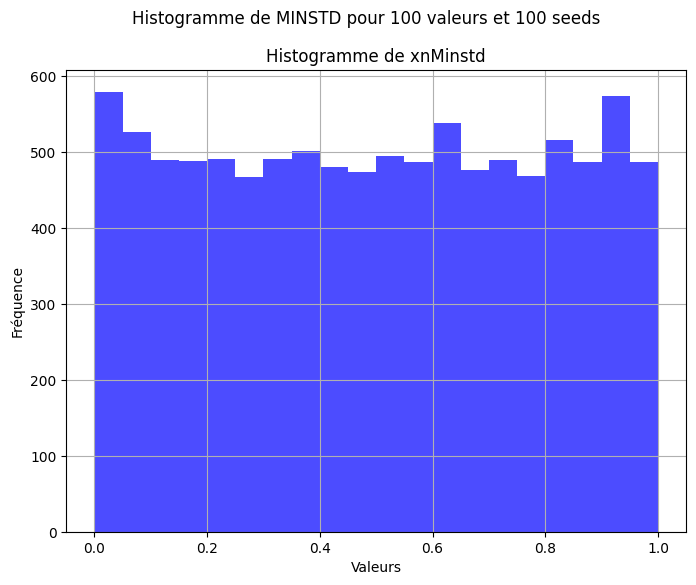

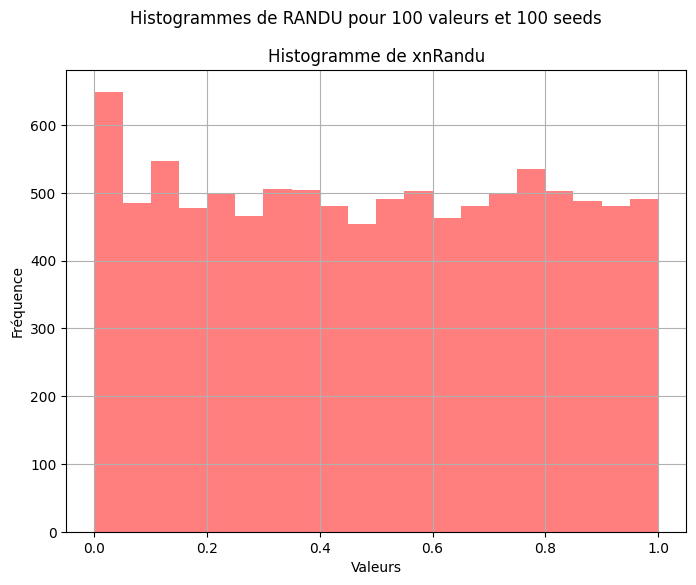

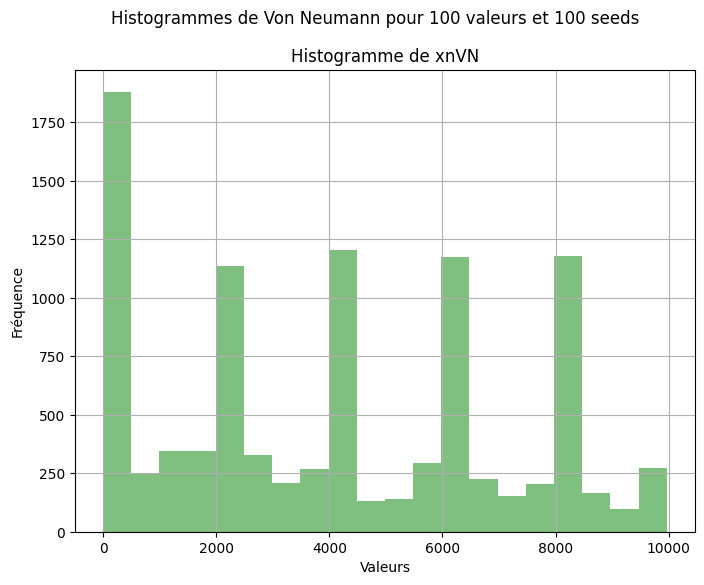

In [19]:
k = 100

xnMinstd = []
xnRandu = []
xnVN = []

for seed in range(100, 200):
    xnMinstd += minstd(seed, 100)
    xnRandu += randu(seed, 100)
    xnVN += vonNeumann(seed, 100)[2]


# Créer une figure pour xnMinstd
plt.figure(figsize=(8, 6))
plt.hist(xnMinstd, bins=20, color="blue", alpha=0.7)
plt.title("Histogramme de xnMinstd")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(True)
plt.suptitle(
    "Histogramme de MINSTD pour 100 valeurs et 100 seeds"
)

# Créer une figure pour xnRandu
plt.figure(figsize=(8, 6))
plt.hist(xnRandu, bins=20, color="red", alpha=0.5)
plt.title("Histogramme de xnRandu")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(True)
plt.suptitle(
    "Histogrammes de RANDU pour 100 valeurs et 100 seeds"
)

# Créer une figure pour xnVN
plt.figure(figsize=(8, 6))
plt.hist(xnVN, bins=20, color="green", alpha=0.5)
plt.title("Histogramme de xnVN")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(True)
plt.suptitle(
    "Histogrammes de Von Neumann pour 100 valeurs et 100 seeds"
)


**Commentaires / remarques :** <span style="color:red"><br>
D'après les tests effectués sur les 3 générateurs Von Neumann, RANDU et Standard Minimal, nous pouvons tirer plusieurs conclusions.<br>
</span>
<span style="color:red"><br>
Von Neumann : L'histogramme des valeurs générées par la méthode de Von Neumann montre une concentration de valeurs proches de zéro, ce qui indique une distribution non uniforme. Cela est dû à la nature de la méthode qui a tendance à produire des nombres avec des zéros au milieu, et donc plus de nombres proches de zéro. Cela souligne une limitation importante de la méthode de Von Neumann.<br>
</span>
<span style="color:red"><br>
RANDU et Standard Minimal : Ces générateurs semblent produire des valeurs plus uniformément réparties, sans concentration apparente autour d'une certaine valeur. Cela suggère qu'ils sont plus appropriés pour générer des nombres pseudo-aléatoires pour des applications nécessitant une distribution uniforme.<br>
</span>
<span style="color:red"><br>
Tests avec 100 seeds différents : Les tests effectués avec 100 seeds différents sont plus concluants pour évaluer la qualité des générateurs. En utilisant différentes seeds, nous pouvons vérifier si les générateurs produisent des distributions uniformes indépendamment de la seed initiale. C'est une meilleure méthode pour vérifier la qualité des valeurs aléatoires générées.
</span>

**Question 9 :** Tracez la valeur obtenue en fonction de la valeur précédente de l’algorithme. Plus précisément, à partir d’un vecteur $u$ de taille $n$, exécutez
`plot(u[0:(n-2)], u[1:n-1])`

Commentez.

426171
621721


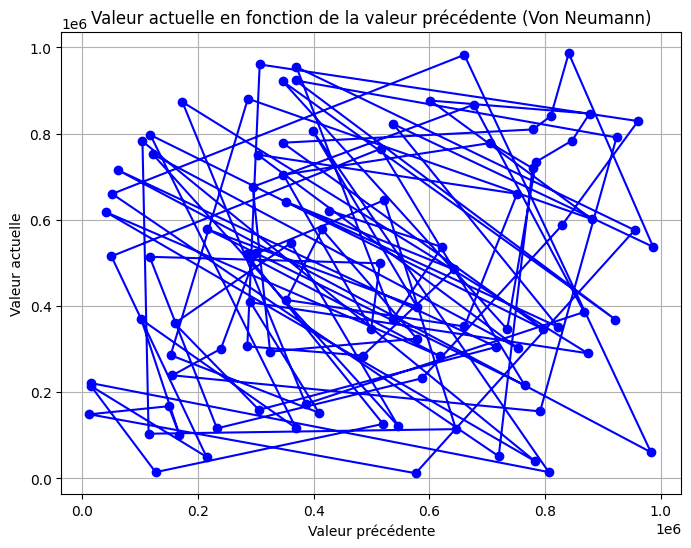

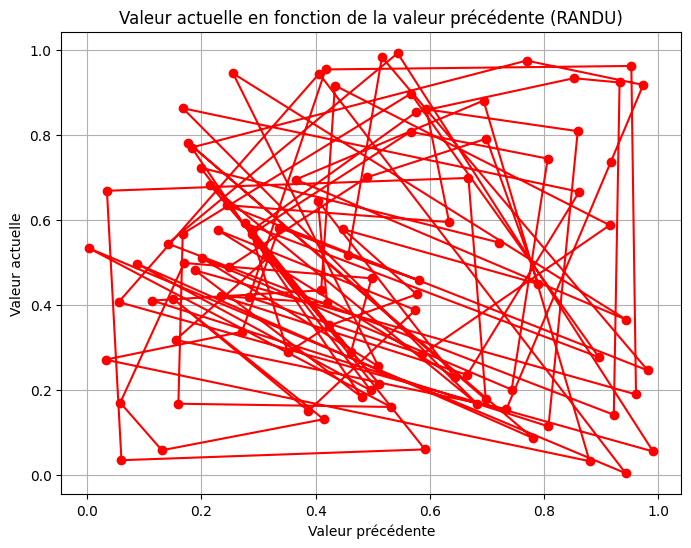

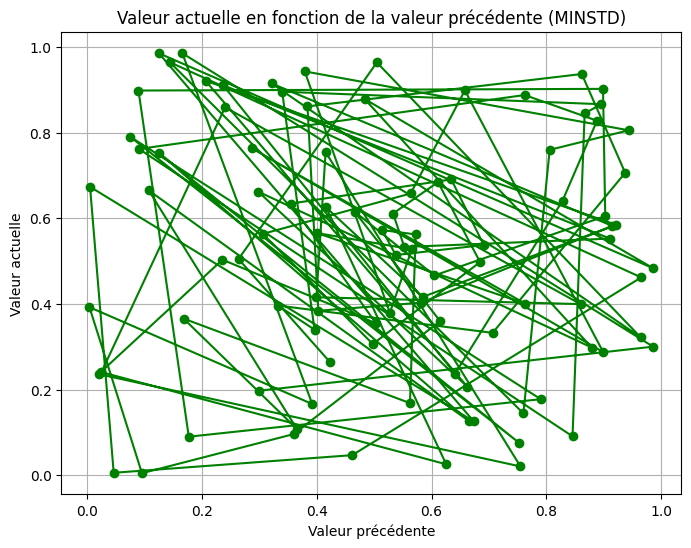

In [20]:
## Donnez votre code ici
import matplotlib.pyplot as plt
import random

seed = 565178
n = 100

Von_list = vonNeumann(seed, n)[2]
RANDU_list = randu(seed, n)
MINSTD_list = minstd(seed, n)

print(Von_list[0])
print(Von_list[1])

# Tracer pour Von_list
plt.figure(figsize=(8, 6))
plt.plot(Von_list[0 : (n - 2)], Von_list[1 : (n - 1)], "bo-")
plt.title("Valeur actuelle en fonction de la valeur précédente (Von Neumann)")
plt.xlabel("Valeur précédente")
plt.ylabel("Valeur actuelle")
plt.grid(True)
plt.show()

# Tracer pour RANDU_list
plt.figure(figsize=(8, 6))
plt.plot(RANDU_list[0 : (n - 2)], RANDU_list[1 : (n - 1)], "ro-")
plt.title("Valeur actuelle en fonction de la valeur précédente (RANDU)")
plt.xlabel("Valeur précédente")
plt.ylabel("Valeur actuelle")
plt.grid(True)
plt.show()

# Tracer pour MINSTD_list
plt.figure(figsize=(8, 6))
plt.plot(MINSTD_list[0 : (n - 2)], MINSTD_list[1 : (n - 1)], "go-")
plt.title("Valeur actuelle en fonction de la valeur précédente (MINSTD)")
plt.xlabel("Valeur précédente")
plt.ylabel("Valeur actuelle")
plt.grid(True)
plt.show()


**Commentaires / remarques :** <span style="color:red"><br>
Le tracé de la valeur obtenue en fonction de la valeur précédente est un bon moyen de visualiser la corrélation entre les nombres successifs générés par un générateur de nombres aléatoires. Dans un bon générateur de nombres aléatoires, il ne devrait y avoir aucune corrélation apparente entre les nombres successifs.<br>
</span>
<span style="color:red"><br>
Ici, on peut voir que les trois générateurs sont capables de produire des séquences de nombres qui semblent aléatoires et sans corrélation apparente.
</span>

### Autres lois

L'objectif de cette section est d'étudier comment les différents phénomènes aléatoires peuvent être simulés à partir de la distribution uniforme sur $[0, 1]$, $U \sim \mathcal{U}_{[0,1]}$. 

Afin de génerer un nombre à partir de la loi uniforme, nous pouvons nous servir de la fonction
[`random.random()`](https://docs.python.org/3/library/random.html#random.random) ou [`random.uniform(a, b)`](https://docs.python.org/3/library/random.html#random.uniform), où $a$ et $b$ sont des bornes d'intervalle sur lequel la variable aléatoire est définie. 

In [21]:
# nombre pseudo-aléatoire réel de la loi uniforme sur [0, 1) et la loi uniforme
from random import random, uniform


In [22]:
# nombre aléatoire entre 0 et 1
u1 = random()
print(u1)
u2 = uniform(a=0, b=1)
print(u2)


0.6560880654928195
0.7772842782252554


Nous allons considérer 2 cas : discrèt et continue.

### Lois discrètes

Soit $U \sim \mathcal{U}_{[0,1]}$, $X$ une v.a.r. discrète à valeurs $\{x_1, x_2, ..., x_n\}$ et $\mathbb{P}(X = x_i) = p_i$, $\sum_{i}p_i = 1$.

Afin de simuler la distribution de $X$, nous divisons l'intervalle $[0, 1]$ en sous-intervalles tels que la longeur de sous-intervalle $i$ est $p_i$ :

$$X = \left\{\begin{array}{ll} x_0 & \text{si } U < p_0 \\ 
x_1 & \text{si } p_0 \leq U < p_0 + p_1 \\  
... \\
x_j & \text{si } \sum_{k=0}^{j-1}p_k \leq U < \sum_{k=0}^{j}p_k 
\end{array}\right.$$

Autrement dit :
$$X = x_j \text{ si } F(x_{j-1}) \leq U < F(x_j)$$
où $F(x)$ est la fonction de répartition de $X$.

$$\mathbb{P}(X=x_j) = \mathbb{P}\left(\sum_{k=0}^{j_1}p_k \leq U < \sum_{k=0}^{j}p_k\right) = p_j$$

#### Loi de Bernoulli

Soit $X$ une v.a.r. discrète qui suit la loi de Bernoulli avec le paramètre $p$, $\mathcal{B}(p)$, e.g. un lancement d'une pièce. Alors, nous pouvons présenter la v.a.r. $X$ somme suit :

$$X = \left\{\begin{array}{ll} 1 & \text{si } U < p \\ 
0 & \text{si } U \geq p\end{array}\right.$$

Alors : 
$$\mathbb{P}(succès) = \mathbb{P}(X = 1) = \mathbb{P}(U < p) = p$$

Notons que dans ce cas-là, l'intervalle $[0, 1]$ est divisé en 2 partie : un de la langueur $p$ et l'autre de longueur $1-p$. La valeur de $X$ est alors définie par la condition dans quelle partie la valeur de $U$ tombe. 

Ecrivez la fonction `bernoulli(p)` qui calcule une valeur de $X$ qui suit la loi de Bernoulli avec le paramètre $p$.

```
def bernoulli(p=0.5):
    """
    Simulation d'un Bernoulli avec le paramètre p.
    
    Keyword arguments:
    p -- probabilité de succès. Par défaut, 0.5 
    
    Return:
    valeur binaire de réalisation de la loi de Bernoulli
    """
```

In [23]:
## Donnez votre code ici
def bernoulli(p=0.5):
    return int(random() < p)


#### Lancement d'une pièce

Ecrivez une simulation de 1000 lancements d'une pièce équilibrée et tracer la probabilité estimée (proportion de nombre de piles) en fonction de nombre de lancements (de 0 jusqu'à 1000).

```
def coin_toss(nsimu=1000, p=0.5):
    """
    Simulation de nsimu réalisation de Bernoulli (lancement d'une pièce) avec le paramètre p.
    
    
    Keyword arguments:
    nsimu -- nombre de simulations. Par défaut, 1000
    p -- probabilité de succès. Par défaut, 0.5 
    
    Return:
    le nombre cumulatif de réussites en commençant avec 0 sur les 1000 runs et la proportion de réussites
    """
```

Afin de calculer le nombre de piles sur $i$ lancement, il est possible de calculer la somme comulative avec `numpy.cumsum()`.

In [24]:
import numpy as np  # calculs numériques
import matplotlib.pyplot as plt  # graphiques


In [25]:
## Donnez votre code ici

def coin_toss(nsimu=1000, p=0.5):
    """
    Simulation de nsimu réalisation de Bernoulli (lancement d'une pièce) avec le paramètre p.
    
    
    Keyword arguments:
    nsimu -- nombre de simulations. Par défaut, 1000
    p -- probabilité de succès. Par défaut, 0.5 
    
    Return:
    le nombre cumulatif de réussites en commençant avec 0 sur les 1000 runs et la proportion de réussites
    """
    # nombre de succès
    success = 0
    # liste des succès cumulatifs
    cumul_success = []
    # simulation
    for i in range(nsimu):
        # réalisation de Bernoulli
        res = bernoulli(p)
        # incrémentation du nombre de succès
        success += res
        # ajout du nombre de succès cumulatifs
        cumul_success.append(success)
    # proportion de succès
    prop_success = success / nsimu
    return cumul_success, prop_success

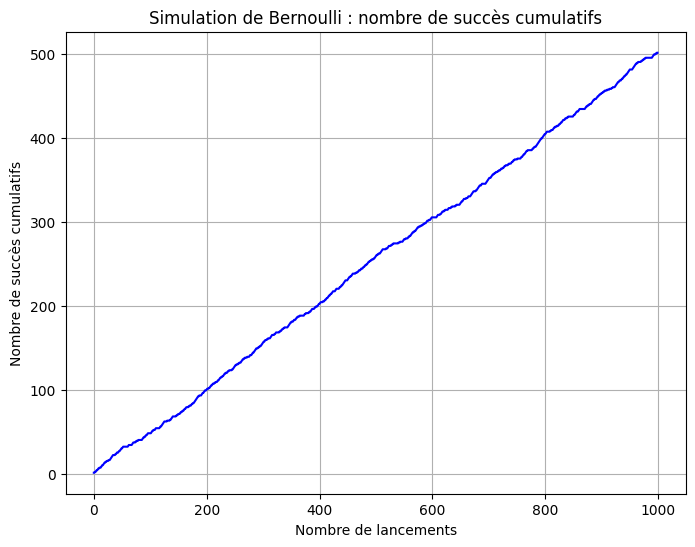

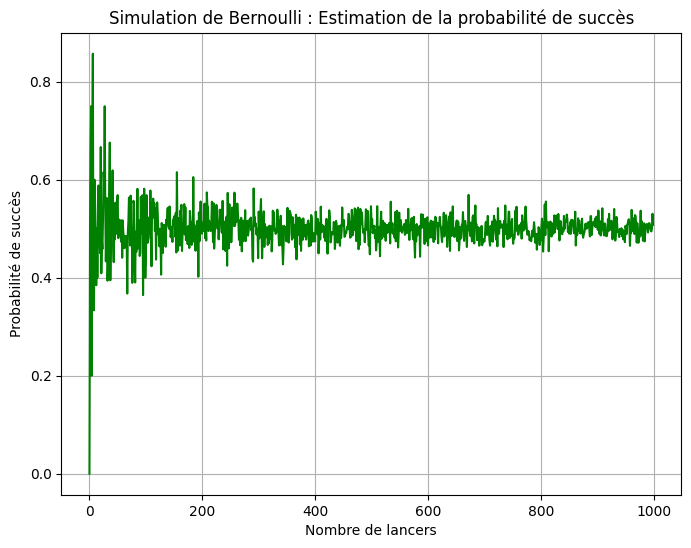

In [26]:
## Donnez votre code ici

nsimu = 1000

# Visualisation
cumul_success, prop_success = coin_toss(nsimu, 0.5)
plt.figure(figsize=(8, 6))
plt.plot(cumul_success, color='blue')
plt.title("Simulation de Bernoulli : nombre de succès cumulatifs")
plt.xlabel("Nombre de lancements")
plt.ylabel("Nombre de succès cumulatifs")
plt.grid(True)
plt.show()

# Visualisation de la probabilité éstimée en fonction du nombre de lancers
plt.figure(figsize=(8, 6))
prop_success = [coin_toss(i, 0.5)[1] for i in range(1, nsimu + 1)]
plt.plot(prop_success, color='green')
plt.title("Simulation de Bernoulli : Estimation de la probabilité de succès")
plt.xlabel("Nombre de lancers")
plt.ylabel("Probabilité de succès")
plt.grid(True)
plt.show()



**Conclusions / commentaires :** <span style="color:red"><br>
D'après les deux graphiques, on peut observer que la probabilité estimée de succès (obtenir un pile) converge vers la valeur théorique de 0.5 avec l'augmentation du nombre de lancements.<br>
</span>
<span style="color:red"><br>
De plus, le nombre de succès cumulatifs augmente linéairement avec le nombre de lancements, ce qui est attendu pour une pièce équilibrée où la probabilité de succès est constante (0.5 dans ce cas). On arrive bien aux alentours de 500 succès au bout de la simulation.<br>
</span>
<span style="color:red"><br>
Ces observations confirment que la fonction bernoulli(p) génère bien des valeurs suivant une loi de Bernoulli avec le paramètre p et que la simulation est correctement réalisée.</span>

### Lois continues : Loi Normale Centrée Réduite

Parmi les lois continues, nous allons nous intéresser au cas de la loi normale centrée réduite, $\mathcal{N}(0, 1)$ de la fonction de densité $\varphi(z) = \frac{e^{-\frac{z^2}{2}}}{\sqrt{2\pi}}$. 

Dans le but de la simultation, nous allons étudier la [méthode de Box-Muller](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Box-Muller) : 

Soient $U_1$ et $U_2$ deux v.a.r. indépendentes qui suivent la loi uniforme. Alors une paire de v.a.r. $Z_1$ et $Z_2$ suivant la loi normale centrée réduite peut être généréé selon la transformation suivante :

$$\left\{ \begin{array}{l} Z_1 = \sqrt{-2 \ln{U_1}} \cos(2\pi U_2) \\ Z_2 = \sqrt{-2 \ln{U_1}} \sin(2\pi U_2) \end{array} \right.$$

Ecrivez la fonction `loi_normale()` qui génère 2 v.a.r. qui suivent la loi normale centrée réduite avec la méthode de Box-Muller. 

```
def loi_normale():
    """
    Génère deux variables aléatoires suivant la loi normale centrée réduite avec la méthode de Box-Muller.
    
    Return:
    z1, z2 -- deux v.a.r. de la loi normale centrée réduite
    """
```

Quelques astuces :
- Afin de calculer la racine carré de $x$, nous pouvons utiliser la fonction `math.sqrt(x)`
- Afin de calculer log de $x$, nous pouvons utiliser la fonction `math.log(x)`
- Le nombre $\pi$ peut être obtenu comme `math.pi`

In [27]:
import math


In [28]:
## Donnez votre code ici
def loi_normale():
    U1 = random()
    U2 = random()
    return [
        math.sqrt(-2 * math.log(U1)) * math.cos(2 * math.pi * U2),
        math.sqrt(-2 * math.log(U1)) * math.sin(2 * math.pi * U2),
    ]


Générez 5000 paires de v.a.r. suivant la loi normale centrée réduite.

In [29]:
## Donnez votre code ici
Z1Z2s = [loi_normale() for _ in range(5000)]


Visualisez les variables $Z_1$ sous forme d'un histogramme. Tracez la courbe de la loi normale centrée réduite par dessus. Commentez.

Quelques astuces :
- Afin de créer un histogram, nous pouvons utilisez la fonction [`plt.hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
- Pour que l'histogramme se base sur la fréquence, utilisez l'option `density=True` de `plt.hist()`, e.g. `plt.hist(z1, density=True)`
- Avant de tracer la loi normale centrée réduite, vous pouvez créer des valeurs à tracer comme suit :

In [30]:
from scipy.stats import norm  # loi normale centrée réduite

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
y = norm.pdf(x, mu, sigma)  # fonction de densité avec les params mu et sigma


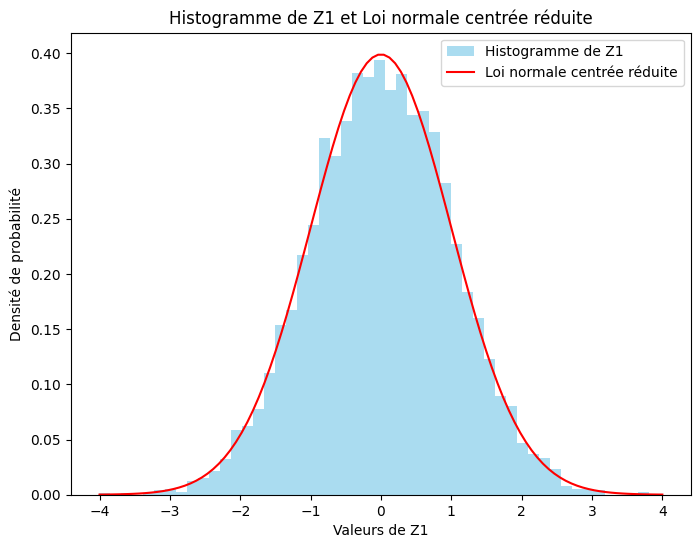

In [31]:
## Donnez votre code ici
# visualisation


# Tracer l'histogramme des échantillons de z1
plt.figure(figsize=(8, 6))
plt.hist([Z1Z2[0] for Z1Z2 in Z1Z2s], bins=50, density=True, color='skyblue', alpha=0.7, label='Histogramme de Z1')

# Tracer la courbe de la loi normale centrée réduite
plt.plot(x, y, 'r-', label='Loi normale centrée réduite')

# Ajouter des titres et des légendes
plt.title('Histogramme de Z1 et Loi normale centrée réduite')
plt.xlabel('Valeurs de Z1')
plt.ylabel('Densité de probabilité')
plt.legend()

# Afficher le graphique
plt.show()

**Conclusions / commentaires :** <span style="color:red"><br>
D'après l'histogramme et la courbe de la loi normale centrée réduite, on peut observer que les valeurs générées par la fonction loi_normale() suivent bien une distribution normale. Les valeurs sont centrées autour de zéro et la majorité des valeurs se situent entre -3 et 3, ce qui est conforme à la propriété de la loi normale centrée réduite. Cela confirme l'efficacité de la méthode de Box-Muller pour générer des variables aléatoires suivant une loi normale à partir de variables aléatoires uniformes.</span>